# International College of Economics and Finance 

# Financial Econometrics. Class 02

## Event-studies

- Howto: An Example with Data Preparation
- Dr. Simon Müller
- [source](https://cran.r-project.org/web/packages/EventStudy/vignettes/howto_eventstudy.html)

### Overview

Today we are will see how to do an event study in R based on the Dieselgate scandal. The Volkswagen emissions scandal (also called “emissionsgate” or “dieselgate”) began in September 2015, when the United States Environmental Protection Agency (EP A) issued a notice of violation of the Clean Air Act to German automaker Volkswagen Group

In [1]:
options(warn = -1)
library(xts)
library(tidyquant)
library(dplyr)
library(readr)
Sys.setlocale("LC_TIME", "C")

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: lubridate

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: PerformanceAnalytics

Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend

Loading required package: quantmod
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
== Need to Learn tidyquant? ====================================================
Business Science offers a 1-hour course - Learning Lab #9: Performance Analysis & Portfolio Optimization with tidyquant!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>

Attaching package: 'dplyr'

The following objects are maske

[1] "C"

### Some descriptive statistics example

In [2]:
# some example dataframe
?mtcars

In [3]:
# let's save our data to a new variable
df <- mtcars

In [4]:
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [5]:
# let's look at structure of our data frame
str(df)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


- So, the columns `vs` and `am` are considered to by numeric. This is not that good as they are clearly boolean
- Its is not a big problem, but still

In [6]:
df$vs <- factor(df$vs, labels = c('V', 'S'))
df$am  <- factor(df$am, labels = c('Auto', 'Manual'))

In [7]:
str(df)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : Factor w/ 2 levels "V","S": 1 1 2 2 1 2 1 2 2 2 ...
 $ am  : Factor w/ 2 levels "Auto","Manual": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


- As for descriptive statistics, most of them are built in functions

In [8]:
median(df$mpg); mean(df$mpg); sd(df$mpg)

[1] 19.2

[1] 20.09062

[1] 6.026948

In [9]:
mean(df$mpg[df$cyl == 6 & df$vs == 'V'])

[1] 20.56667

In [10]:
mean(df$mpg[df$cyl == 6 | df$vs == 'V'])

[1] 17.07273

In [11]:
aggregate(x = df$hp, by = list(df$vs), FUN = mean)

Group.1,x
<fct>,<dbl>
V,189.72222
S,91.35714


In [12]:
mean_hp_vs <- aggregate(x = df$hp, by = list(df$vs), FUN = mean)

In [13]:
mean_hp_vs

Group.1,x
<fct>,<dbl>
V,189.72222
S,91.35714


In [14]:
colnames(mean_hp_vs) <- c("VS", 'Mean HP')

In [15]:
mean_hp_vs

VS,Mean HP
<fct>,<dbl>
V,189.72222
S,91.35714


In [16]:
aggregate(hp ~ vs, df, mean)

vs,hp
<fct>,<dbl>
V,189.72222
S,91.35714


In [17]:
aggregate(hp ~ vs + am, df, mean)

vs,am,hp
<fct>,<fct>,<dbl>
V,Auto,194.16667
S,Auto,102.14286
V,Manual,180.83333
S,Manual,80.57143


In [18]:
aggregate(cbind(hp, mpg) ~ vs + am, df, mean)

vs,am,hp,mpg
<fct>,<fct>,<dbl>,<dbl>
V,Auto,194.16667,15.05000
S,Auto,102.14286,20.74286
V,Manual,180.83333,19.75000
S,Manual,80.57143,28.37143


In [19]:
library(psych)

In [20]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,32,20.090625,6.0269481,19.200,19.696154,5.4114900,10.400,33.900,23.500,0.6106550,-0.37276603,1.06542396
cyl,2,32,6.187500,1.7859216,6.000,6.230769,2.9652000,4.000,8.000,4.000,-0.1746119,-1.76211977,0.31570933
disp,3,32,230.721875,123.9386938,196.300,222.523077,140.4763500,71.100,472.000,400.900,0.3816570,-1.20721195,21.90947271
hp,4,32,146.687500,68.5628685,123.000,141.192308,77.0952000,52.000,335.000,283.000,0.7260237,-0.13555112,12.12031731
drat,5,32,3.596563,0.5346787,3.695,3.579231,0.7042350,2.760,4.930,2.170,0.2659039,-0.71470062,0.09451874
wt,6,32,3.217250,0.9784574,3.325,3.152692,0.7672455,1.513,5.424,3.911,0.4231465,-0.02271075,0.17296847
qsec,7,32,17.848750,1.7869432,17.710,17.827692,1.4158830,14.500,22.900,8.400,0.3690453,0.33511422,0.31588992
vs*,8,32,1.437500,0.5040161,1.000,1.423077,0.0000000,1.000,2.000,1.000,0.2402577,-2.00193762,0.08909831
am*,9,32,1.406250,0.4989909,1.000,1.384615,0.0000000,1.000,2.000,1.000,0.3640159,-1.92474143,0.08820997


In [21]:
?describe

In [22]:
describeBy(x = df, group = df$vs, mat = T, digits = 2)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg1,1,V,1,18,16.62,3.86,15.65,16.42,2.97,10.40,26.00,15.60,0.48,-0.05,0.91
mpg2,2,S,1,14,24.56,5.38,22.80,24.34,6.00,17.80,33.90,16.10,0.41,-1.40,1.44
cyl1,3,V,2,18,7.44,1.15,8.00,7.62,0.00,4.00,8.00,4.00,-1.74,1.94,0.27
cyl2,4,S,2,14,4.57,0.94,4.00,4.50,0.00,4.00,6.00,2.00,0.85,-1.36,0.25
disp1,5,V,3,18,307.15,106.77,311.00,308.52,72.65,120.30,472.00,351.70,-0.26,-1.06,25.16
disp2,6,S,3,14,132.46,56.89,120.55,127.11,61.82,71.10,258.00,186.90,0.80,-0.49,15.21
hp1,7,V,4,18,189.72,60.28,180.00,186.81,48.18,91.00,335.00,244.00,0.45,-0.15,14.21
hp2,8,S,4,14,91.36,24.42,96.00,92.00,32.62,52.00,123.00,71.00,-0.24,-1.61,6.53
drat1,9,V,5,18,3.39,0.47,3.18,3.37,0.32,2.76,4.43,1.67,0.74,-0.73,0.11


In [23]:
is.na(df$mpg)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [24]:
sum(is.na(df$mpg))

[1] 0

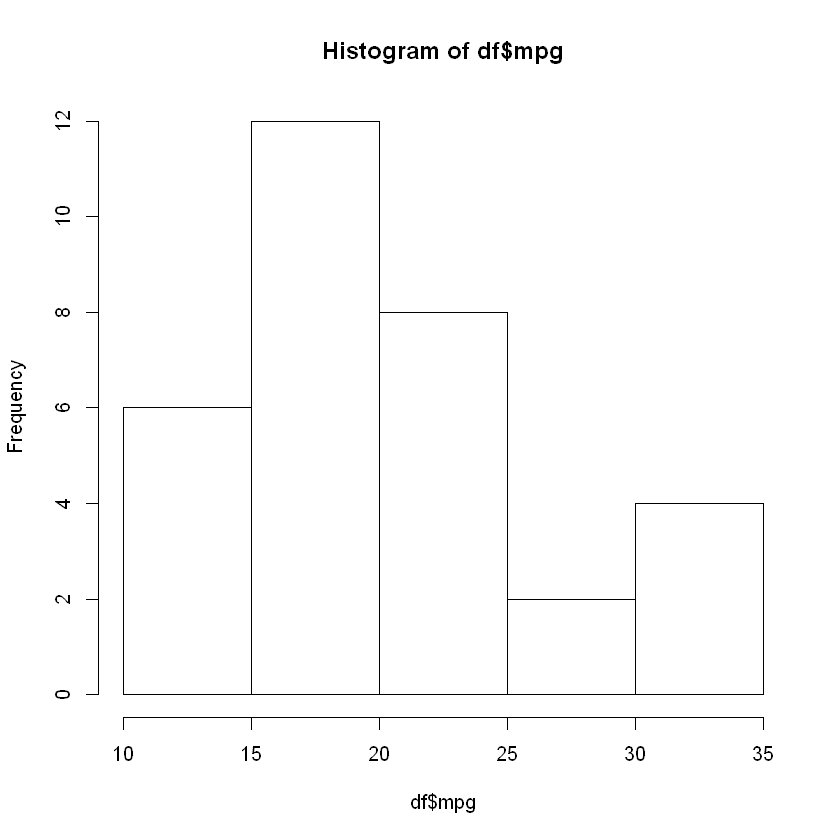

In [25]:
hist(df$mpg)

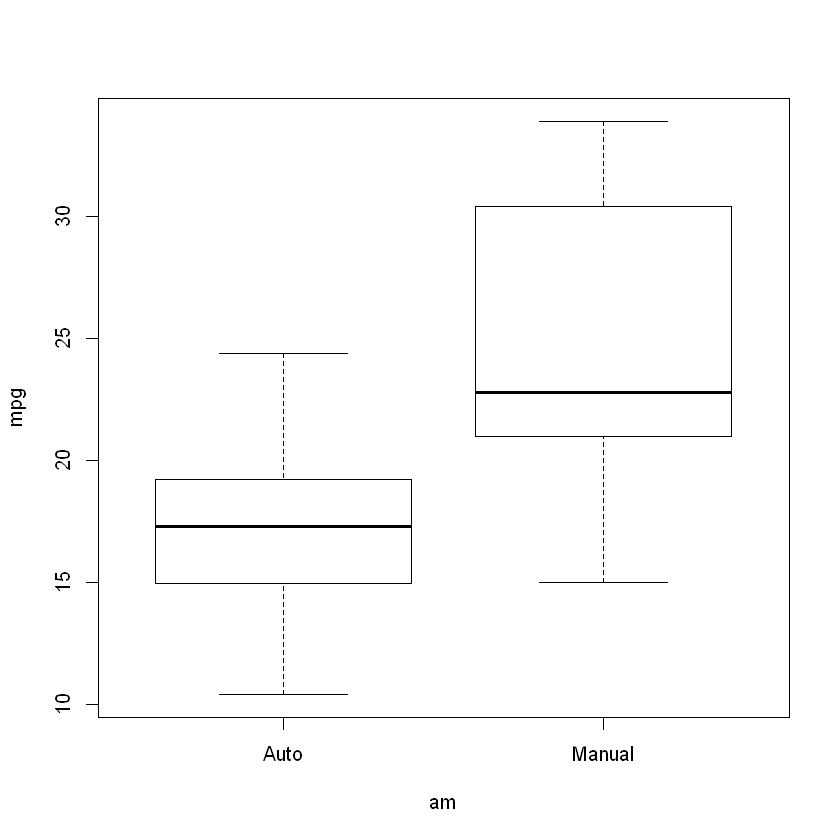

In [26]:
boxplot(mpg~am, data = df)

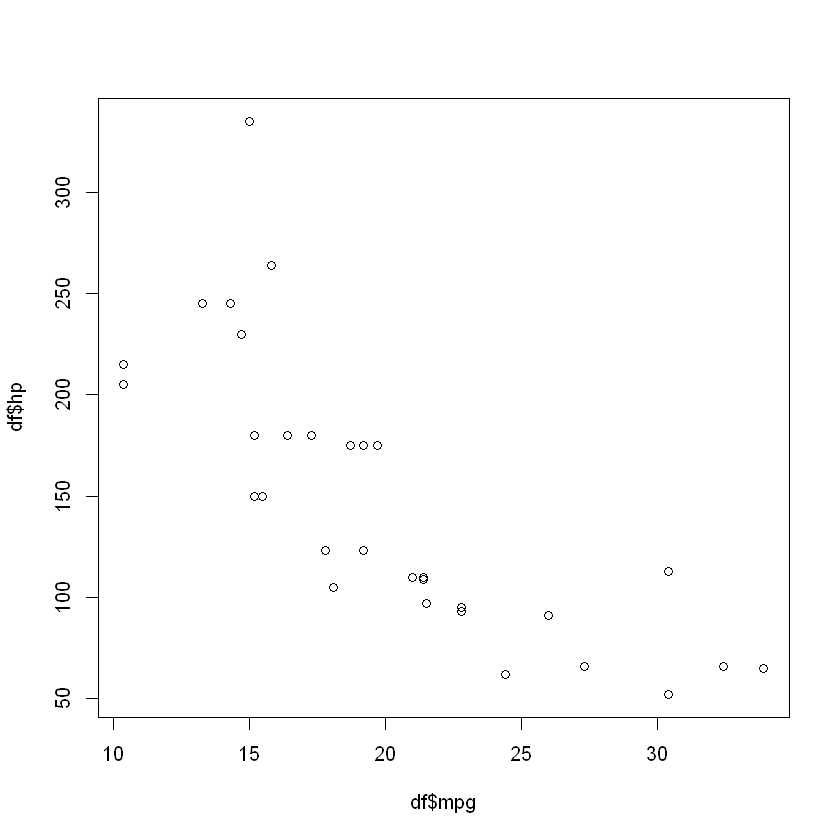

In [27]:
plot(df$mpg, df$hp)

In [28]:
cor.test(x = df$mpg, y = df$hp)


	Pearson's product-moment correlation

data:  df$mpg and df$hp
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 


In [29]:
fit <- cor.test(x = df$mpg, y = df$hp)

In [30]:
str(fit)

List of 9
 $ statistic  : Named num -6.74
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named int 30
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1.79e-07
 $ estimate   : Named num -0.776
  ..- attr(*, "names")= chr "cor"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "correlation"
 $ alternative: chr "two.sided"
 $ method     : chr "Pearson's product-moment correlation"
 $ data.name  : chr "df$mpg and df$hp"
 $ conf.int   : num [1:2] -0.885 -0.586
  ..- attr(*, "conf.level")= num 0.95
 - attr(*, "class")= chr "htest"


In [31]:
fit$p.value

[1] 1.787835e-07

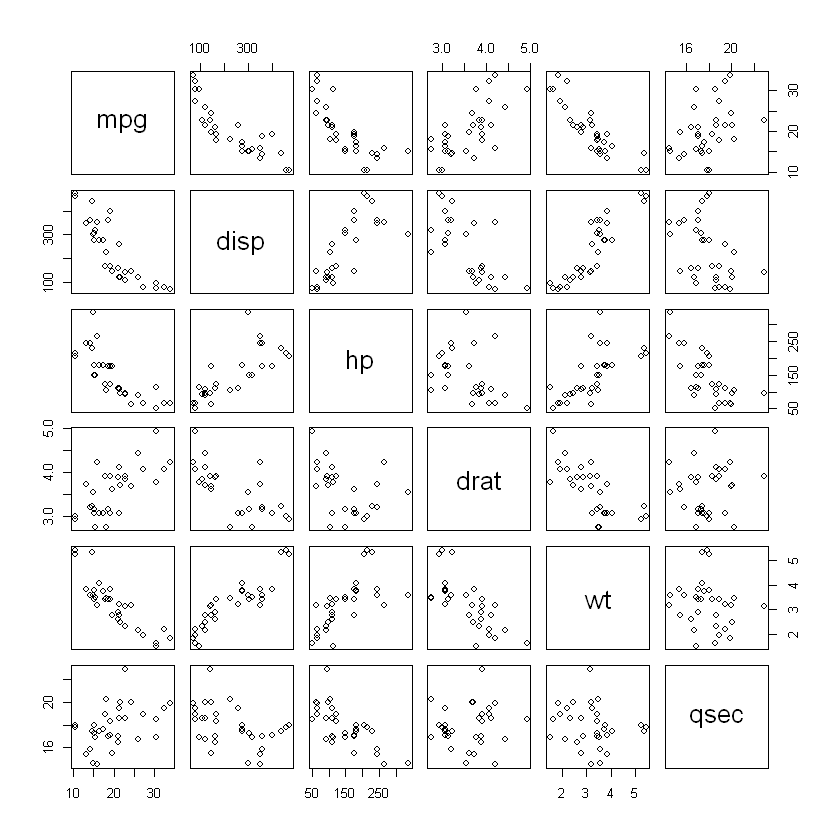

In [32]:
pairs(df[, c(1, 3:7)])

In [33]:
corr.test(df[, c(1, 3:7)])

Call:corr.test(x = df[, c(1, 3:7)])
Correlation matrix 
       mpg  disp    hp  drat    wt  qsec
mpg   1.00 -0.85 -0.78  0.68 -0.87  0.42
disp -0.85  1.00  0.79 -0.71  0.89 -0.43
hp   -0.78  0.79  1.00 -0.45  0.66 -0.71
drat  0.68 -0.71 -0.45  1.00 -0.71  0.09
wt   -0.87  0.89  0.66 -0.71  1.00 -0.17
qsec  0.42 -0.43 -0.71  0.09 -0.17  1.00
Sample Size 
[1] 32
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
      mpg disp   hp drat   wt qsec
mpg  0.00 0.00 0.00 0.00 0.00 0.05
disp 0.00 0.00 0.00 0.00 0.00 0.05
hp   0.00 0.00 0.00 0.05 0.00 0.00
drat 0.00 0.00 0.01 0.00 0.00 0.68
wt   0.00 0.00 0.00 0.00 0.00 0.68
qsec 0.02 0.01 0.00 0.62 0.34 0.00

 To see confidence intervals of the correlations, print with the short=FALSE option

In [34]:
?lm

In [35]:
model <- lm(mpg ~ hp, data = df)

In [36]:
summary(df)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec       vs          am    
 Min.   :2.760   Min.   :1.513   Min.   :14.50   V:18   Auto  :19  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   S:14   Manual:13  
 Median :3.695   Median :3.325   Median :17.71                     
 Mean   :3.597   Mean   :3.217   Mean   :17.85                     
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90                     
 Max.   :4.930   Max.   :5.424   Max.   :22.90                     
      gear            carb      
 Min.   :3.000   Min.   :1.000  
 1s

In [37]:
summary(model)


Call:
lm(formula = mpg ~ hp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


In [38]:
str(model)

List of 12
 $ coefficients : Named num [1:2] 30.0989 -0.0682
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "hp"
 $ residuals    : Named num [1:32] -1.594 -1.594 -0.954 -1.194 0.541 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ effects      : Named num [1:32] -113.65 -26.046 -0.556 -0.852 0.67 ...
  ..- attr(*, "names")= chr [1:32] "(Intercept)" "hp" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:32] 22.6 22.6 23.8 22.6 18.2 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:32, 1:2] -5.657 0.177 0.177 0.177 0.177 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "hp"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.18 1.08
  ..$ pivot: int [1:2] 1 2

In [39]:
model$coefficients[1]

(Intercept) 
   30.09886

In [40]:
model$coefficients[2]

hp 
-0.06822828

In [41]:
model$fitted.values

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
          22.593750           22.593750           23.753631           22.593750 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          18.158912           22.934891           13.382932           25.868707 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          23.617174           21.706782           21.706782           17.817770 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
          17.817770           17.817770           16.112064           15.429781 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
          14.406357           25.595794           26.550990           25.664022 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
          23.480718           19.864619           19.864619           13.382932 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
          18.158912           25.595794           23.890087           22.389065 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
          12.086595           18.158912            7.242387           22.661978

### Data Preparation

We use the package `tidyquant` to fetch the automotive stock data from Yahoo Finance. As we cannot get the full volume size from this companies through Yahoo Finance API.

Let’s define the window from which we want to fetch the data of the German auto companies.

In [42]:
startDate <- "2014-05-01"
endDate <- "2015-12-31"

We focus us on the big five motor manufacturers in Germany, namely
- VW Group
    - VW
    - Audi
- Porsche
- Daimler
- BMW

In [43]:
# Firm Data
firmSymbols <- c("VOW3.DE", "NSU.DE", "PAH3.DE", "BMW.DE", "DAI.DE")
firmNames <- c("VW preferred", "Audi", "Porsche Automobil Hld", "BMW", "Daimler")
firms <- getSymbols(Symbols = firmSymbols, from = startDate, to = endDate)
firms.prices <- cbind(VOW3.DE$VOW3.DE.Adjusted, PAH3.DE$PAH3.DE.Adjusted, NSU.DE$NSU.DE.Adjusted,
DAI.DE$DAI.DE.Adjusted, BMW.DE$BMW.DE.Adjusted)
head(firms.prices)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



           VOW3.DE.Adjusted PAH3.DE.Adjusted NSU.DE.Adjusted DAI.DE.Adjusted
2014-05-02         166.3827         58.60135        611.2695        48.71801
2014-05-05         166.3827         58.38600        609.3226        48.46794
2014-05-06         164.7694         56.95291        614.1895        47.92370
2014-05-07         163.8538         55.84652        614.2382        47.65892
2014-05-08         166.9495         57.60635        614.5303        47.80602
2014-05-09         166.3827         57.56180        609.1281        47.45298
           BMW.DE.Adjusted
2014-05-02        66.57825
2014-05-05        66.36887
2014-05-06        66.13704
2014-05-07        65.95009
2014-05-08        66.03234
2014-05-09        65.89774

As reference market we choose the DAX.

In [44]:
# Index Data
indexSymbol <- c("^GDAXI")
indexName <- c("DAX")
index <- getSymbols(Symbols = indexSymbol, from = startDate, to = endDate, auto.assign =  F)
head(index)

           GDAXI.Open GDAXI.High GDAXI.Low GDAXI.Close GDAXI.Volume
2014-05-02    9611.79    9627.38   9533.30     9556.02     88062300
2014-05-05    9536.38    9548.17   9407.09     9529.50     61911600
2014-05-06    9570.25    9571.63   9440.47     9467.53     82062900
2014-05-07    9418.50    9554.35   9410.08     9521.30     92732600
2014-05-08    9547.27    9622.30   9487.57     9607.40    102022500
2014-05-09    9591.32    9602.86   9558.11     9581.45     80084100
           GDAXI.Adjusted
2014-05-02        9556.02
2014-05-05        9529.50
2014-05-06        9467.53
2014-05-07        9521.30
2014-05-08        9607.40
2014-05-09        9581.45

In [45]:
# Making log returns
firms.ret <- diff(log(firms.prices))[-1] * 100
index.ret <- diff(log(index$GDAXI.Adjusted))[-1] * 100

The parameters for this Event Study are:
- Estimation window: 250
- Event window: -10 to 10
- Event date: 18.09.2015

In [46]:
startpoint  <- which(index(index.ret) == "2015-09-18")
estimation_window <- 250
event_window <- 20

### Fitting market model

In [47]:
fitted.models <- list()

est_window_market <- index.ret[(startpoint - estimation_window - event_window/2):(startpoint - event_window/2 - 1)]

for(i in colnames(firms.ret)){
    est_window_returns <- firms.ret[(startpoint - estimation_window - event_window/2):(startpoint - event_window/2- 1), i]
    fitted.models[[i]] <- lm(est_window_returns ~ est_window_market)
    print(i)
    print(summary(fitted.models[[i]]))
}

[1] "VOW3.DE.Adjusted"

Call:
lm(formula = est_window_returns ~ est_window_market)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5745 -0.4788 -0.0388  0.5483  3.2121 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.04109    0.06268  -0.656    0.513    
est_window_market  1.05141    0.04426  23.757   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9909 on 248 degrees of freedom
Multiple R-squared:  0.6947,	Adjusted R-squared:  0.6935 
F-statistic: 564.4 on 1 and 248 DF,  p-value: < 2.2e-16

[1] "PAH3.DE.Adjusted"

Call:
lm(formula = est_window_returns ~ est_window_market)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5162 -0.5490 -0.0155  0.5388  2.6449 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.06513    0.05747  -1.133    0.258    
est_window_market  0.98885    0.04058  24.370   <2e-16 ***
---
Signif. codes:  0

### Making predictions

In [48]:
predicted <- matrix(NA, nrow = event_window, ncol = length(firmSymbols))
colnames(predicted) <- c("VOW3.DE", "NSU.DE", "PAH3.DE", "BMW.DE", "DAI.DE")
for(i in 1:length(firmSymbols)){
    for(j in 1:event_window){
        predicted[j, i] <- (fitted.models[[i]]$coefficients[1] + fitted.models[[i]]$coefficients[2] * index.ret[(startpoint - event_window/2 - 1 + j)])
    }
}

# What about re-writing it in a "normal", not eye-bleeding loop... I mean matrices, of course
# Try to do it at home

predicted <- as.xts(predicted, order.by = as.Date(index(index.ret)[(startpoint - event_window/ 2):(startpoint + event_window/2-1)]))

### Calculating abnormal returns

In [49]:
y_true <- matrix(NA, nrow = event_window, ncol = length(firmSymbols))
colnames(y_true) <- c("VOW3.DE", "NSU.DE", "PAH3.DE", "BMW.DE", "DAI.DE")
y_true <- firms.ret[(startpoint - event_window/2):(startpoint + event_window/2-1)]
ab.ret <- matrix(NA, nrow = NROW(predicted), ncol = ncol(predicted))
colnames(ab.ret) <- colnames(predicted)
for(i in 1:ncol(predicted)){
    ab.ret[, i] <- y_true[, i] - predicted[, i]
}

ab.ret <- as.data.frame(ab.ret)
rownames(ab.ret) <- as.Date(index(predicted))

### Calculating abnormal returns

Remember that $J_{3} = [\frac{N^{+}}{N}-0.5]\frac{\sqrt{N}}{0.5}\rightarrow^{d}\mathcal{N(0, 1)}$

In [50]:
J_3 <- vector()
p_value <- vector()
for (i in colnames(ab.ret)){
    J_3[i] <- ((sum(ab.ret[i] > 0) / nrow(ab.ret[i])) - 0.5)*(sqrt(nrow(ab.ret[i]))/0.5)
    p_value[i] <- ifelse(J_3[i] > 0, 2*(1-pnorm(J_3[i])), 2 * pnorm(J_3[i])) # how can you change this line without using 0.5?
}
print(firmSymbols)
print(J_3)
sprintf("%.3f", p_value)

[1] "VOW3.DE" "NSU.DE"  "PAH3.DE" "BMW.DE"  "DAI.DE" 
   VOW3.DE     NSU.DE    PAH3.DE     BMW.DE     DAI.DE 
 0.0000000  0.0000000 -1.3416408  0.4472136  1.7888544 


[1] "1.000" "1.000" "0.180" "0.655" "0.074"

- Still, it is very usefull, especially for you home assignment, to calculate CARs and SCARS
- For simplicity, let's do this only for one stock

In [51]:
vow <- firms.ret$VOW3.DE.Adjusted # let's pick VW

In [52]:
event_returns <- vow[(startpoint - event_window/2):(startpoint + event_window/2-1)]

In [53]:
event_market <- index.ret[(startpoint - event_window/2):(startpoint + event_window/2-1)]

In [54]:
est_window_vow <- vow[(startpoint - estimation_window - event_window/2):(startpoint - event_window/2- 1)]

In [55]:
vow_model <- lm(est_window_vow ~ est_window_market)

In [56]:
summary(vow_model)


Call:
lm(formula = est_window_vow ~ est_window_market)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5745 -0.4788 -0.0388  0.5483  3.2121 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.04109    0.06268  -0.656    0.513    
est_window_market  1.05141    0.04426  23.757   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9909 on 248 degrees of freedom
Multiple R-squared:  0.6947,	Adjusted R-squared:  0.6935 
F-statistic: 564.4 on 1 and 248 DF,  p-value: < 2.2e-16


In [57]:
coeff_vow <- as.numeric(vow_model$coefficients)

In [58]:
out_of_sample <- as.matrix(cbind(rep(1, event_window), event_market))

In [59]:
in_sample <- as.matrix(cbind(rep(1, estimation_window), est_window_market))

In [60]:
predictions <- out_of_sample %*% coeff_vow

In [61]:
abnorm_returns <- event_returns - predictions

In [62]:
abnorm_returns

           VOW3.DE.Adjusted
2015-09-04       0.19510900
2015-09-07      -0.35696989
2015-09-08       0.90968908
2015-09-09       1.37974522
2015-09-10      -0.07489486
2015-09-11       0.93956384
2015-09-14      -0.55122943
2015-09-15       0.70642787
2015-09-16      -0.09582368
2015-09-17      -1.07974730
2015-09-18       0.04178897
2015-09-21     -20.87600330
2015-09-22     -17.97546387
2015-09-23       4.63967223
2015-09-24       2.66535957
2015-09-25      -7.24979604
2015-09-28      -5.45888258
2015-09-29      -3.80731675
2015-09-30       0.37320304
2015-10-01       0.41258668

In [63]:
ab.ret[1]

,VOW3.DE
,<dbl>
2015-09-04,0.19510900
2015-09-07,-0.35696989
2015-09-08,0.90968908
2015-09-09,1.37974522
2015-09-10,-0.07489486
2015-09-11,0.93956384
2015-09-14,-0.55122943
2015-09-15,0.70642787
2015-09-16,-0.09582368


- I hope that you remember this formula from lecture  
$$\sigma(c)^2 = \hat{\sigma}_{\varepsilon_i}^2\cdot c'(I + X^{*}(X'X)^{-1}X'^{*})\cdot c$$

In [64]:
ones <- diag(event_window)

In [65]:
var_abnorm <- (summary(vow_model)$sigma)^2*(ones + out_of_sample %*% solve(t(in_sample) %*% in_sample)%*% t(out_of_sample))

In [66]:
c_matrix <- t(lower.tri(matrix(1,event_window,event_window),diag = TRUE))

In [67]:
event_car <- c(rep(0, event_window))

In [68]:
event_car[event_window/2] <- 1

In [69]:
c_matrix <- cbind(c_matrix, event_car)

In [70]:
CARs_for_each_c <- t(c_matrix)%*%abnorm_returns

In [71]:
Var_for_each_c <- diag(t(c_matrix)%*%var_abnorm%*%c_matrix)

In [72]:
SCAR_for_each_c <- CARs_for_each_c/sqrt(Var_for_each_c)

In [73]:
SCAR_for_each_c

,VOW3.DE.Adjusted
,0.1950301
,-0.1147991
,0.4331075
,1.0650878
,0.9170739
,1.2174770
,0.9178483
,1.1052116
,1.0084558
,0.6170143


In [74]:
p_vals_asym <- 2*(1-pnorm(abs(SCAR_for_each_c)))

In [75]:
p_vals_student <- 2*(1-pt(abs(SCAR_for_each_c), df=estimation_window-2))

In [76]:
p_vals <- cbind(p_vals_asym, p_vals_student)

In [77]:
colnames(p_vals) <- c("Asymptotic SCARs p-val", "Student-t SCARs p-val")

In [78]:
p_vals

,Asymptotic SCARs p-val,Student-t SCARs p-val
,8.453694e-01,8.455291e-01
,9.086044e-01,9.086973e-01
,6.649367e-01,6.653131e-01
,2.868362e-01,2.878721e-01
,3.591039e-01,3.599949e-01
,2.234228e-01,2.245799e-01
,3.586983e-01,3.595900e-01
,2.690679e-01,2.701390e-01
,3.132357e-01,3.142186e-01
,5.372253e-01,5.377913e-01


In [79]:
abnorm_returns[,1] <- round(as.numeric(abnorm_returns),5)

In [80]:
colnames(abnorm_returns) <- c("Abnormal Returns")

In [81]:
colnames(CARs_for_each_c) <- c("CARs for each c")

In [82]:
p_vals <- round(p_vals, 3)

In [83]:
results <- list(summary(vow_model), abnorm_returns, CARs_for_each_c, p_vals)

In [84]:
results

[[1]]

Call:
lm(formula = est_window_vow ~ est_window_market)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5745 -0.4788 -0.0388  0.5483  3.2121 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.04109    0.06268  -0.656    0.513    
est_window_market  1.05141    0.04426  23.757   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9909 on 248 degrees of freedom
Multiple R-squared:  0.6947,	Adjusted R-squared:  0.6935 
F-statistic: 564.4 on 1 and 248 DF,  p-value: < 2.2e-16


[[2]]
           Abnormal Returns
2015-09-04          0.19511
2015-09-07         -0.35697
2015-09-08          0.90969
2015-09-09          1.37975
2015-09-10         -0.07489
2015-09-11          0.93956
2015-09-14         -0.55123
2015-09-15          0.70643
2015-09-16         -0.09582
2015-09-17         -1.07975
2015-09-18          0.04179
2015-09-21        -20.87600
2015-09-22        -17.97546
2015-09-23  

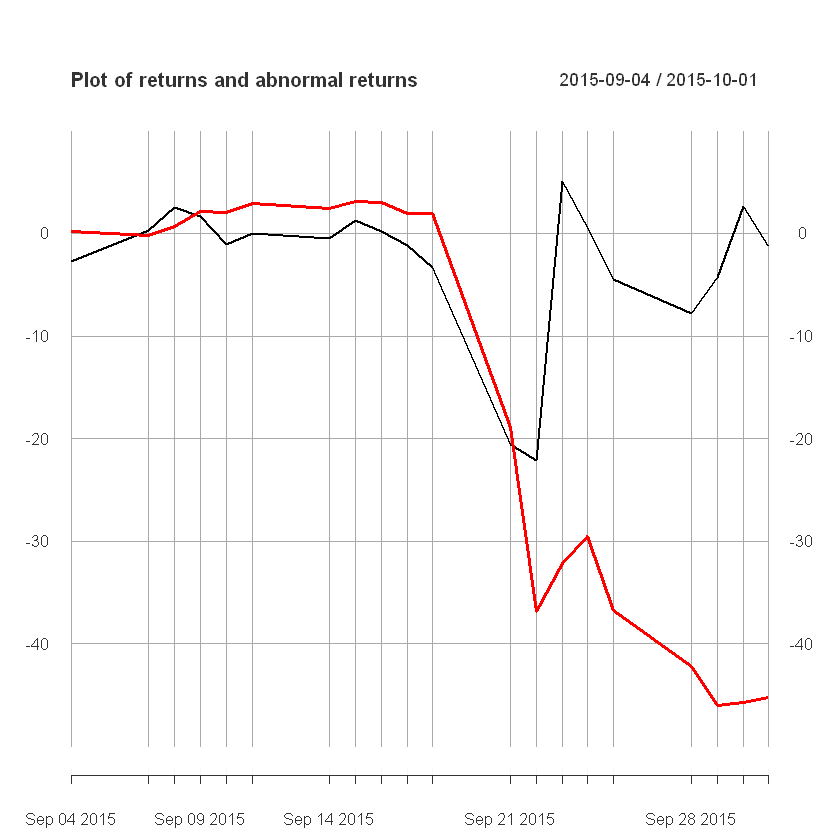

In [85]:
plot <- plot(vow[(startpoint-event_window/2):(startpoint+event_window/2-1)], 
     main = 'Plot of returns and abnormal returns', 
     ylim = c(-50, 10), 
     col = 'black')

lines(cumsum(abnorm_returns), 
      col = 'red', 
      lwd = 3)

legend('bottomleft',
       legend = c('Returns', 'Cumulative Abnormal Returns'), 
       col = c('black', 'red'), 
       lty=1, 
       lwd = 1)